**Chapter 5 – Support Vector Machines**

_This notebook contains solution to exercise 9 from chapter 5_

# 9. LinearSVC, SVC and SGDClassifier

_Exercise: Train a `LinearSVC` on a linearly separable dataset. Then train an `SVC` and a `SGDClassifier` on the same dataset. See if you can get them to produce roughly the same model._

This notebook requires Python 3.7 or above:

In [15]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from pathlib import Path
from packaging import version
from sklearn.datasets import make_classification # Generate a random n-class classification problem.
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")
assert sys.version_info >= (3, 7)

In [8]:
IMAGES_PATH = "/home/silviojr/Documents/Courses/handson_ml3/my_folder/images/chapter_5_svm"
IMAGES_PATH = Path(IMAGES_PATH)
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Instead of fetching a dataset we will just generate one linearly separable dataset:

In [9]:
# Generate a linearly separable dataset
X, y = make_classification(n_samples=1000, n_features=2,
                           n_informative=2, n_redundant=0,
                           n_clusters_per_class=1,
                           flip_y=0,
                           random_state=42)

In [10]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Train LinearSVC

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

linear_svc = LinearSVC(loss="hinge", C=5, dual=True, random_state=42)
linear_svc.fit(X_scaled, y_train)

# Train SVC
svc = SVC(kernel='linear', C=5)
svc.fit(X_scaled, y_train)

# Train SGDClassifier
sgd_classifier = SGDClassifier(alpha=0.01, random_state=42)
sgd_classifier.fit(X_scaled, y_train)

/home/silviojr/.virtualenvs/handson/lib/python3.10/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SGDClassifier(alpha=0.01, random_state=42)

In [18]:
# Evaluate the models
linear_svc_acc = accuracy_score(y_test, linear_svc.predict(X_test))
svc_acc = accuracy_score(y_test, svc.predict(X_test))
sgd_classifier_acc = accuracy_score(y_test, sgd_classifier.predict(X_test))

print("Accuracy scores:")
print("LinearSVC:", linear_svc_acc)
print("SVC:", svc_acc)
print("SGDClassifier:", sgd_classifier_acc)

Accuracy scores:
LinearSVC: 0.855
SVC: 0.86
SGDClassifier: 0.84


In [19]:
# Plot decision boundaries
def plot_decision_boundary(clf, X, y, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=30, edgecolors='k')
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.show()

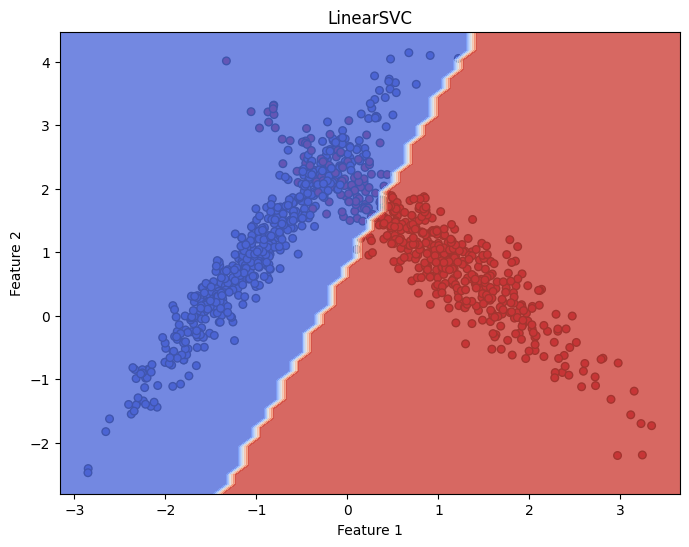

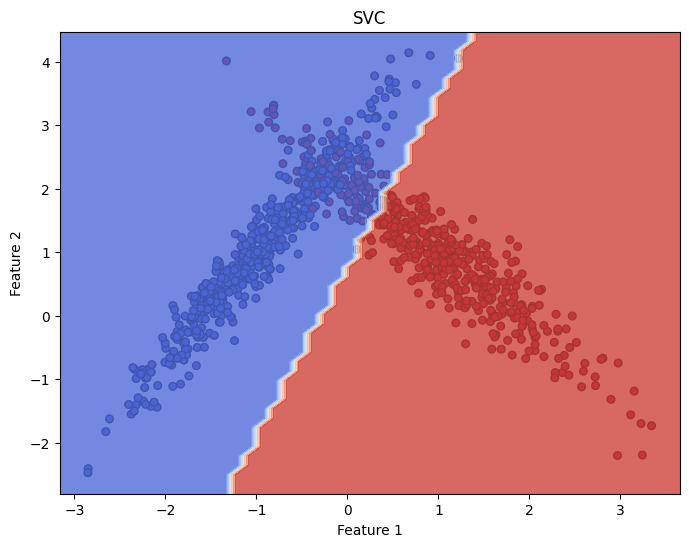

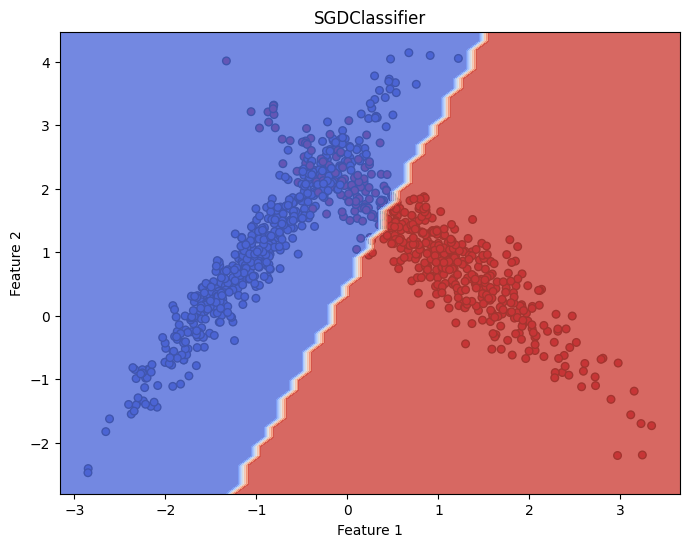

In [20]:
# Plot decision boundaries for each model
plot_decision_boundary(linear_svc, X, y, 'LinearSVC')
plot_decision_boundary(svc, X, y, 'SVC')
plot_decision_boundary(sgd_classifier, X, y, 'SGDClassifier')